<a href="https://colab.research.google.com/github/Guilherme-dL/EconoFinPyR/blob/main/Op%C3%A7%C3%B5es%20-%20Modelos%20de%20Precifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de Precificação de Opções:

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as si
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,5)
matplotlib.rcParams['legend.fontsize'] = 15
matplotlib.rcParams['figure.titlesize'] = 20
sns.set()

## Black - Scholes:

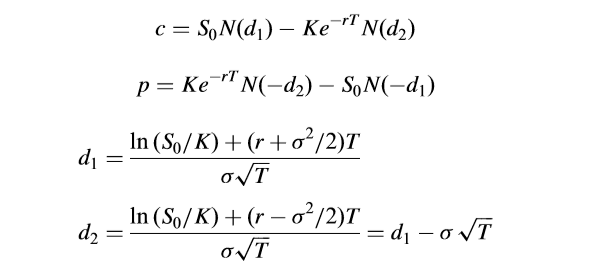

In [6]:
# Definindo preço de opções pelo modelo de Black-Scholes
def blackScholes(S,K,T,r,sigma,type = 'C'):
  d1 = (np.log(S/K)+(r+(sigma**2)/2)*T)/(sigma*np.sqrt(T))
  d2 = d1 - sigma*np.sqrt(T)
  try:
    if type == 'C':
      preço = S*si.norm.cdf(d1,0,1) - K*np.exp(-r*(T))*si.norm.cdf(d2,0,1)
    elif type == 'P':
      preço = K*np.exp(-r*(T))*si.norm.cdf(-d2,0,1) - S*si.norm.cdf(-d1,0,1)
    return preço
  except:
    print('Parâmetros inválidos')

## Modelo Binomial:

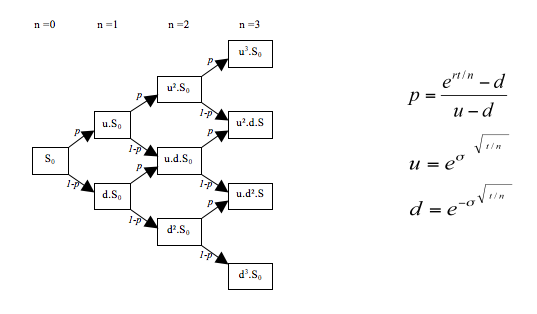

In [7]:
def binomial_call(S, K, T, r, sigma, N):
    dt = T/N
    u =  np.exp(sigma * np.sqrt(dt))
    d = 1/u
    p = (np.exp(r * dt) - d)/(u - d)
    C = {}
    for m in range(0, N+1):
            C[(N, m)] = max(S * (u ** (2*m - N)) - K, 0)
    for k in range(N-1, -1, -1):
        for m in range(0,k+1):
            C[(k, m)] = np.exp(-r * dt) * (p * C[(k+1, m+1)] + (1-p) * C[(k+1, m)])
    return C[(0,0)]

In [21]:
print('Valor pelo Modelo Binomial: '+ str(binomial_call(100,120,1,0.01,0.2,50)))
print('Valor pelo Modelo Black&Scholes: '+ str(blackScholes(100,120,1,0.01,0.2)))

Valor pelo Modelo Binomial: 2.341005565915819
Valor pelo Modelo Black&Scholes: 2.340649396637783


## Comparação Black-Scholes x Aproximação pelo Binomial:

In [10]:
Call_BS = blackScholes(100,120,1,0.01,0.2)

In [11]:
Bin_Aprox = []
for sim in range(1,500):
  Bin_Aprox.append(binomial_call(100, 120, 1, 0.01,0.2,sim))

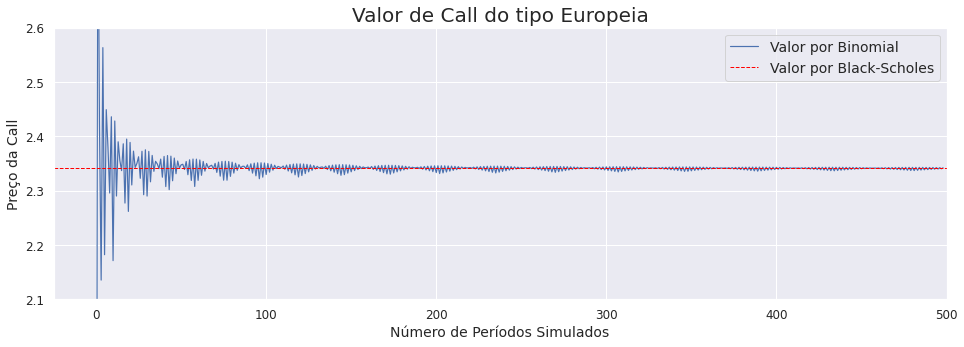

In [12]:
plt.plot(Bin_Aprox,label='Valor por Binomial',lw=1.2)
plt.axhline(Call_BS,label='Valor por Black-Scholes',ls='--',lw=1,color='red')
plt.title('Valor de Call do tipo Europeia',fontsize=20)
plt.xlabel('Número de Períodos Simulados',fontsize=14)
plt.ylabel('Preço da Call',fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(right=500)
plt.ylim(2.1,2.6)
plt.legend(fontsize=14);

## Modelo de Simulação de Monte Carlo:

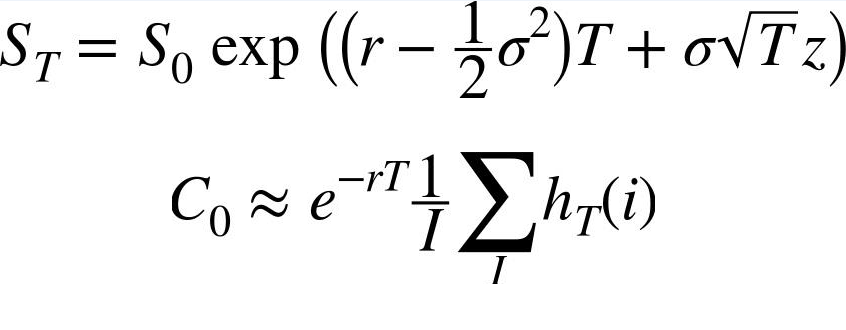

In [13]:
def monteCarlo_call(S,K,T,r,sigma,N):
  payoffs = []
  discount_factor = np.exp(-r * T)
  for i in range(N+1):
    St = S*np.exp((r-(1/2)*(sigma**2))*T+sigma*np.sqrt(T)*np.random.normal(0,1))
    call_payoff = max(0.0,St-K)
    payoffs.append(
        call_payoff
    )
  price = discount_factor * (sum(payoffs)/float(N))
  return price

In [22]:
print('Valor pelo Modelo Monte Carlo: '+ str(monteCarlo_call(100,120,1,0.01,0.2,50)))
print('Valor pelo Modelo Black&Scholes: '+ str(blackScholes(100,120,1,0.01,0.2)))

Valor pelo Modelo Monte Carlo: 2.2634484421515904
Valor pelo Modelo Black&Scholes: 2.340649396637783


## Comparação Black-Scholes x Aproximação pelo Modelo Binomial x Apromicação pelo Modelo Monte Carlo:

In [14]:
MC_Call = []
for sim in range(1,1000):
  MC_Call.append(monteCarlo_call(100, 120, 1, 0.01,0.2,sim))

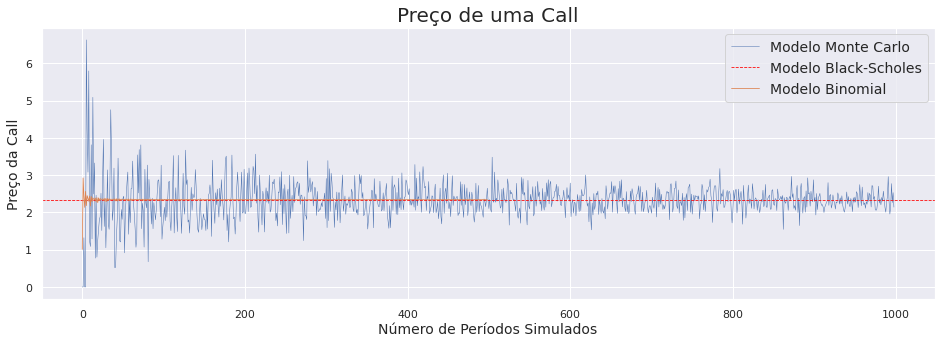

In [15]:
plt.plot(MC_Call,label='Modelo Monte Carlo',lw=0.5)
plt.axhline(Call_BS,color='red',ls='--',lw=0.8,label='Modelo Black-Scholes')
plt.plot(Bin_Aprox,lw=0.8,label='Modelo Binomial')
plt.title('Preço de uma Call',fontsize=20)
plt.xlabel('Número de Períodos Simulados',fontsize=14)
plt.ylabel('Preço da Call',fontsize=14)
plt.legend(fontsize=14)